In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Numpy

## Задача

Сгенерировать вектор из 100 элементов и превратить его в:

- матрицу 10x10
- вектор 1x100
- вектор 100x1

In [2]:
vector = np.arange(100)

matrix10 = vector.reshape(10, 10)
vec1 = vector.reshape(1, 100)
vec2 = vector.reshape(100, 1)

print(matrix10.shape, vec1.shape, vec2.shape)

(10, 10) (1, 100) (100, 1)


## Задача - Решение СЛАУ

$Ax = b$

Функция обратной матрицы - `np.linalg.inv(A)`

Решение СЛАУ выглядит так:

$Ax = b$

$A^{-1}Ax=A^{-1}b$

$x=A^{-1}b$

In [3]:
A = np.array([
    [3, -2],
    [5, 1]]
)
b = np.array([-6, 3])
# Решение - [0, 3]
x = np.linalg.inv(A) @ b
x

array([1.11022302e-16, 3.00000000e+00])

In [4]:
np.linalg.solve(A, b)

array([0., 3.])

## Задача

Сгенерировать случайную матрицу и посчитать сумму положительных элементов в каждой строке, в каждом столбце.

In [5]:
a = np.random.uniform(-1, 1, size=(5, 3))
a[a < 0] = 0

In [6]:
a.sum(axis=0)

array([0.22441064, 0.97982425, 0.19784682])

In [7]:
a.sum(axis=1)

array([0.        , 0.14535151, 0.22441064, 0.        , 1.03231956])

## Задача

Вывести матрицу из нулей и единиц в шахматном порядке

In [8]:
n = 5
m = np.zeros((n, n))

m[::2, ::2] = 1
m[1::2, 1::2] = 1

m

array([[1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1.]])

## Задача

Решим СЛАУ 2 порядка методом Крамера

https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%9A%D1%80%D0%B0%D0%BC%D0%B5%D1%80%D0%B0

На практике этот метод неэффективен, но зато позволяет разобраться с индексацией

In [9]:
A = np.array([
    [3, -2],
    [5, 1]]
)
b = np.array([-6, 3])

A1 = A.copy()
A2 = A.copy()

A1[:, 0] = b
A2[:, 1] = b

delta = np.linalg.det(A)
delta1 = np.linalg.det(A1)
delta2 = np.linalg.det(A2)

if delta == 0:
    x = None
    print('Корней нет')
else:
    x = [delta1 / delta, delta2 / delta]
    print(x)

[0.0, 2.9999999999999996]


Решение можно оформить в функцию

In [10]:
def solve_cramer(A, b):
    A1 = A.copy()
    A2 = A.copy()
    A1[:, 0] = b
    A2[:, 1] = b

    delta = np.linalg.det(A)
    delta1 = np.linalg.det(A1)
    delta2 = np.linalg.det(A2)

    if delta == 0:
        return None
    else:
        return [delta1 / delta, delta2 / delta]

Сравним скорость решения метода Крамера и стандартного способа, реализованного в numpy

In [11]:
%%timeit
solve_cramer(A, b)

17.3 µs ± 292 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [12]:
%%timeit
np.linalg.solve(A, b)

7.19 µs ± 95.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


numpy решает в 3 раза быстрее даже для матрицы 2х2

# Pandas

## Задача

Посчитать средний рост для высоких людей

In [13]:
# Сгенерируем датафрейм
ages = [25, 35, 45]
heights = [170, 180, 190]
names = ["Alex", "Polina", "Misha"]
data = {'age': ages, 'height': heights, 'name': names}
df = pd.DataFrame(data)
df["height_category"] = df["height"].apply(lambda x: "высокий" if x > 175 else "низкий")
df

,age,height,name,height_category
0,25,170,Alex,низкий
1,35,180,Polina,высокий
2,45,190,Misha,высокий


In [14]:
df.loc[df['height_category'] == 'высокий', 'height'].mean()

185.0

## Задача

Вывести среднюю температуру за январь 2010 года

In [15]:
# Прочитаем данные
df = pd.read_csv('../data/weather.csv')
df["Day"] = pd.to_datetime(df["Day"])
df["year"] = df.Day.dt.year
df["month"] = df.Day.dt.month
df["day"] = df.Day.dt.day
df.head()

,Day,t,year,month,day
0,2008-01-01,0,2008,1,1
1,2008-01-02,-5,2008,1,2
2,2008-01-03,-11,2008,1,3
3,2008-01-04,-11,2008,1,4
4,2008-01-05,-12,2008,1,5


In [16]:
df.loc[(df['year'] == 2010) & (df['month'] == 1), 't'].mean()

-11.419354838709678

## Задания

Стараемся избегать циклов

### Easy
- Найти насколько отличалась температура в самый жаркий и самый холодный день

In [17]:
abs(df['t'].min() - df['t'].max())

57

### Normal
- Вывести среднюю температуру за каждый год

In [18]:
df.groupby('year').mean()['t']

year
2008    8.545205
2009    7.610959
2010    7.117808
2011    8.337912
2012    6.980822
2013    8.728767
2014    8.931507
2015    9.079452
2016    7.907104
Name: t, dtype: float64

### Hard
- Вывести день, в который максимально изменилась температура

Подсказка: `diff()`

## Решение

С помощью `diff` посчитаем разницу между соседними днями

In [19]:
df['t'].diff()

0        NaN
1       -5.0
2       -6.0
3        0.0
4       -1.0
5       -2.0
6        8.0
7       -1.0
8        1.0
9        6.0
10       2.0
11       1.0
12      -1.0
13       1.0
14      -1.0
15       0.0
16       0.0
17      -1.0
18       0.0
19       1.0
20       0.0
21      -1.0
22      -2.0
23       0.0
24       3.0
25      -1.0
26      -2.0
27      -3.0
28       4.0
29       2.0
        ... 
3255    -2.0
3256    -1.0
3257    -6.0
3258    12.0
3259   -11.0
3260     6.0
3261     3.0
3262     0.0
3263    -6.0
3264    -1.0
3265    -1.0
3266     1.0
3267     3.0
3268     0.0
3269     2.0
3270     1.0
3271     0.0
3272     1.0
3273     1.0
3274    -1.0
3275     2.0
3276     0.0
3277    -1.0
3278     1.0
3279     2.0
3280    -4.0
3281    -4.0
3282     3.0
3283     3.0
3284     1.0
Name: t, Length: 3285, dtype: float64

Видим, что есть отрицательные значения, но нам не важно в какую сторону менялась температура, поэтому берем абсолютное значение.

Также есть `NaN`, но для решения этой задачи это не должно быть проблемой

In [20]:
abs(df['t'].diff())

0        NaN
1        5.0
2        6.0
3        0.0
4        1.0
5        2.0
6        8.0
7        1.0
8        1.0
9        6.0
10       2.0
11       1.0
12       1.0
13       1.0
14       1.0
15       0.0
16       0.0
17       1.0
18       0.0
19       1.0
20       0.0
21       1.0
22       2.0
23       0.0
24       3.0
25       1.0
26       2.0
27       3.0
28       4.0
29       2.0
        ... 
3255     2.0
3256     1.0
3257     6.0
3258    12.0
3259    11.0
3260     6.0
3261     3.0
3262     0.0
3263     6.0
3264     1.0
3265     1.0
3266     1.0
3267     3.0
3268     0.0
3269     2.0
3270     1.0
3271     0.0
3272     1.0
3273     1.0
3274     1.0
3275     2.0
3276     0.0
3277     1.0
3278     1.0
3279     2.0
3280     4.0
3281     4.0
3282     3.0
3283     3.0
3284     1.0
Name: t, Length: 3285, dtype: float64

Сохраним это в новую колонку, чтобы дальше ее использовать

In [21]:
df['diff_t'] = abs(df['t'].diff())

Теперь надо найти максимальное значение и посмотреть в каком дне это было. Максимум можно найти при помощи функции `max`

In [22]:
df['diff_t'].max()

15.0

In [23]:
df[df['diff_t'] == 15]

,Day,t,year,month,day,diff_t
2335,2014-05-27,7,2014,5,27,15.0


Можно не писать фильтрацию, а просто воспользоваться функцией argmax, которая вернет индекс максимального значения

In [24]:
df['diff_t'].argmax()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


2335

Ну и решим задачу окончательно

In [25]:
df.loc[df['diff_t'].argmax()]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


Day       2014-05-27 00:00:00
t                           7
year                     2014
month                       5
day                        27
diff_t                     15
Name: 2335, dtype: object

Вся задача решается в две строки:

In [26]:
df['diff_t'] = abs(df['t'].diff())
df.loc[df['diff_t'].argmax()]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  


Day       2014-05-27 00:00:00
t                           7
year                     2014
month                       5
day                        27
diff_t                     15
Name: 2335, dtype: object

## Задание - нарисовать $n$ линий

Написать функцию, которая на вход принимает параметр $n$ и рисует $n$ графиков по такому приципу:

$$y = x$$
$$y = 2x$$
$$y = 3x$$
$$...$$
$$y = nx$$

In [27]:
def draw_lines(n):
    x = np.linspace(-5, 5, 100)
    for i in range(n):
        plt.plot(x, i * x)

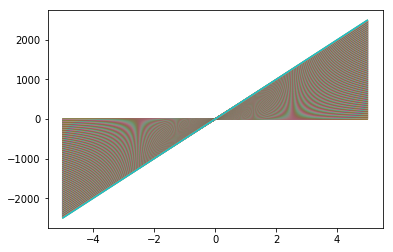

In [28]:
draw_lines(500)

## Задача

По заданным точкам нарисовать квадрат.



In [29]:
square_coord = [
    (0, 0),
    (1, 0),
    (1, 1),
    (0, 1)
]

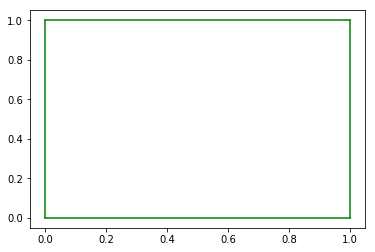

In [30]:
for i in range(len(square_coord)):
    x1, y1 = square_coord[i - 1]
    x2, y2 = square_coord[i]
    plt.plot([x1, x2], [y1, y2], color='g')

Можно оформить код в функцию и он будет рисовать любую замкнутую фигуру

In [31]:
def draw_figure(coords):
    for i in range(len(coords)):
        x1, y1 = coords[i - 1]
        x2, y2 = coords[i]
        plt.plot([x1, x2], [y1, y2], color='g')

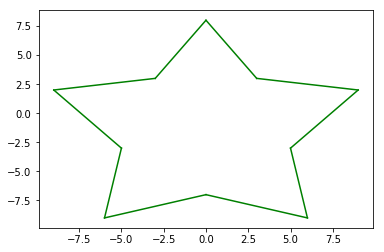

In [32]:
star_coords = [
    (-9, 2),
    (-3, 3),
    (0, 8),
    (3, 3), 
    (9, 2),
    (5, -3),
    (6, -9),
    (0, -7),
    (-6, -9),
    (-5, -3)
]
draw_figure(star_coords)

## Задача

Дана СЛАУ второго порядка, нужно отобразить на графике линии и точку их пересечения

$$a_{11}x + a_{12}y = b_1$$
$$a_{21}x + a_{22}y = b_2$$



## Решение

Мы можем нарисовать линию такого вида:

$y = kx + b$

Для этого можем привести каждое из уравнений выше к такому виду:

$y = \frac{(b_1 - a_{11}x)}{a_{12}}$

$y = \frac{(b_2 - a_{21}x)}{a_{22}}$

Чтобы использовать эти формулы, нужно чтобы коэфициенты $a_{12}, a_{22}$ были не равны 0 (на 0 делить нельзя).

Как будет выглядеть уравнение, если обнулить коэфициенты?

$a_{11}x = b1$

$a_{21}x = b2$

В таком случае графики будут вертикальными линиями с иксами $\frac{b1}{a_{11}}$ и $\frac{a_{21}}{b2}$

Можно писать код. Сначала напишем функцию, которая принимает на вход строку из матрицы (массив $[a_{11}, a_{12}]$, например), а также значение $b$. 

In [33]:
A = np.array([[1, 0], [0, 1]])
b = np.array([3, 2])

solution = np.linalg.solve(A, b)
solution

array([3., 2.])

In [34]:
def draw_line(a_row, b):
    # Будем рисовать от -50 до 50
    x = np.linspace(-50, 50, 100)
    if a_row[1] == 0:
        # Если коэфициент 0, рисуем вертикальную линию от -50 до 50
        y = [-50, 50]
        x_value = b / a_row[0]
        x = [x_value, x_value]
    else:
        # Если не 0, то используем обычную формулу
        y = (b - a_row[0] * x) / a_row[1]
    plt.plot(x, y)

Будем передавать сначала первую строку:

In [35]:
A[0, :]

array([1, 0])

Затем вторую:

In [36]:
A[1, :]

array([0, 1])

Получим вот такие линии:

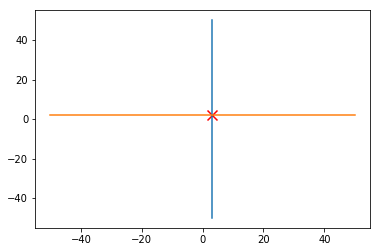

In [37]:
draw_line(A[0, :], b[0])
draw_line(A[1, :], b[1])

# Нарисуем также точку пересечения
plt.scatter([solution[0]], [solution[1]], marker='x', s=100, c='r')

Можем оформить итоговое решение в функцию, которая будет принимать массивы A и b и рисовать по ним график

In [38]:
def draw_linear_solution(A, b):
    solution = np.linalg.solve(A, b)
    draw_line(A[0, :], b[0])
    draw_line(A[1, :], b[1])

    # Нарисуем также точку пересечения
    plt.scatter([solution[0]], [solution[1]], marker='x', s=100, c='r')

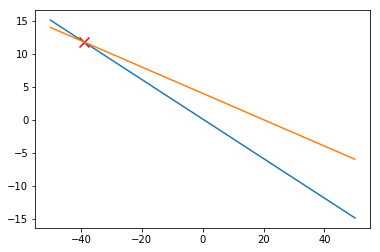

In [39]:
A = np.array([[3, 10], [1, 5]])
b = np.array([1, 20])
draw_linear_solution(A, b)

Добавим слайдер

Для этого необходимо установить `ipywidgets`:

```
conda install ipywidgets
```

In [40]:
%matplotlib inline
from ipywidgets import interact
import ipywidgets as widgets

Если посмотреть примеры, то на вход функции должны поступать числа. Напишем функцию, которая будет принимать на вход числа, преобразовывать их в матрицу и передавать в функцию, которую мы написали раньше.

In [41]:
def draw_linear_from_numbers(a11, a12, a21, a22, b1, b2):
    A = np.array([[a11, a12], [a21, a22]])
    b = np.array([b1, b2])
    draw_linear_solution(A, b)
    # Для красоты зафиксируем положение графика
    plt.xlim(-50, 50)
    plt.ylim(-50, 50)

Создаем слайдеры

In [42]:
slider1 = widgets.FloatSlider(value=1, min=-5, max=5, step=0.01)
slider2 = widgets.FloatSlider(value=0, min=-5, max=5, step=0.01)
slider3 = widgets.FloatSlider(value=0, min=-5, max=5, step=0.01)
slider4 = widgets.FloatSlider(value=1, min=-5, max=5, step=0.01)
slider5 = widgets.FloatSlider(value=3, min=-5, max=5, step=0.01)
slider6 = widgets.FloatSlider(value=2, min=-5, max=5, step=0.01)

Передаем в функцию `interact` нашу функцию и какие слайдеры будут отвечать за какие аргументы

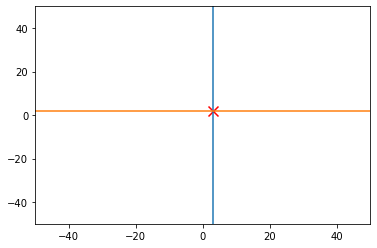

<function __main__.draw_linear_from_numbers(a11, a12, a21, a22, b1, b2)>

In [ ]:
interact(draw_linear_from_numbers, a11=slider1, a12=slider2, a21=slider3, a22=slider4, b1=slider5, b2=slider6)